In [1]:
import sys
import os
sys.path.append('../../')
os.chdir('../../')

import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = f"../resultados/"
prueba_15_preprocessing = f"15_X_X_Total_Yes/"
prueba_15_no_preprocessing = f"15_X_X_Total_No/"
prueba_15_summer = f"15_X_summer_Total_Yes/"
prueba_15_winter = f"15_X_winter_Total_Yes/"

### Prueba 1

In [4]:
path_final = os.path.join(path,prueba_15_preprocessing)

In [8]:
text_file = open(os.path.join(path_final,"coeffs_1_total.txt"), "r")
data = text_file.read()
text_file.close()

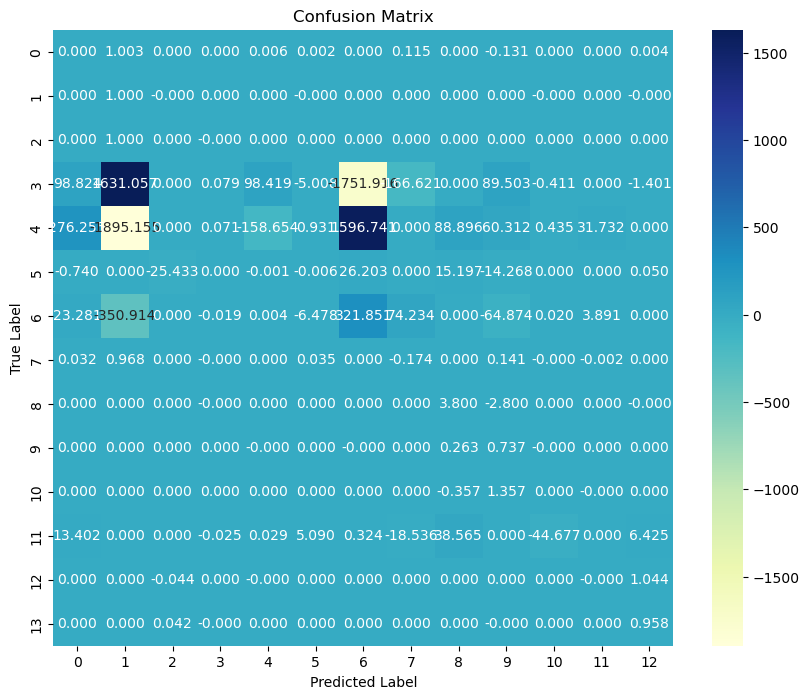

In [15]:
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.array(matrix)

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(np_matrix, annot=True, cmap="YlGnBu", fmt=".3f")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
a = pl.read_csv("./data/final_files/normal_rare/high.csv")
a.shape

(28587840, 18)

In [4]:
list(a["year"].unique())

[2000, 2006, 2009, 2010, 2013, 2014, 2017]

### Reducir dataset muy grandes

In [ ]:
import random
import pandas as pd
import polars as pl
import os

files = ["low"]

for file in files:
    new_df = pl.DataFrame()
    print(f"./data/final_files/normal_rare/{file}.csv")
    df = pl.read_csv(os.path.join(f"./data/final_files/normal_rare/{file}.csv"))
    years = list(df["year"].unique())
    # print(years)
    n_events_total = 27585 / len(years)
    # print(n_events_total)
    for index,year in enumerate(years):
        df_new_year = df.filter(pl.col("year") == year)
        # n_events = (27585 * df.filter(df["year"] == year).shape[0]) / df.shape[0]
        print(year)
        n_to_take = int(n_events_total/38)
        # print(n_to_take)
        for windfarm in range(0,38):
            df_new = df_new_year.filter(pl.col("index") == windfarm)
            n_events = list(df_new["n_event"].unique())
            # random_indices = random.sample(range(0,n_events+1), min(n_events,n_to_take))
            random_indices = random.sample(n_events, min(len(n_events),n_to_take))
            df_selected = df_new.filter(df_new['n_event'].is_in(random_indices))
            new_df = pl.concat([new_df,df_selected], rechunk=True)
            # print(new_df.shape)
    new_df.write_csv(os.path.join("./data/final_files/normal_rare_reducido",f"{file}.csv"))

In [ ]:
a = pd.read_csv("./data/final_files/normal_13_reducido/high.csv")


### Prueba 2

In [3]:
path_final = os.path.join(path,prueba_15_preprocessing)
text_file = open(os.path.join(path_final,"coeffs_1_total.txt"), "r")
data = text_file.read()
text_file.close()
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.array(matrix)

In [7]:
import sys
sys.path.append('../')

from src.IKM.data_exploration.distances import DistanceMeasurer
distance_measurer = DistanceMeasurer()

In [10]:
final_str = ""

dirs = [
    r"../resultados/15_X_X_Total_Yes/coeffs_1_total.txt",
    r"../resultados/15_X_X_Total_Yes/coeffs_2_total.txt",
    # r"../../../resultados/15_X_X_Total_Yes/coeffs_3_total.txt"
]

for dir_1 in dirs:
    for dir_2 in dirs:
        if dir_1 == dir_2:
            continue

file_path = rf'distance.txt'
distance = distance_measurer.distance_between_coeffs_combined_objs(dir_1, dir_2)

In [8]:
data = [-22.667990349083567,
-0.00013010590173898179,
-0.00014715510780948158,
-31485.270829276134,
-136660.603691003,
-92.60746802990309,
-4064.168504925796,
-15.464553372193755,
-6.668008670619523e-05,
-1.9297618996310062e-05,
-2.0476675723174638e-05,
-13345.872530530547,
-3.506113840395786e-06,
-3.0963102858050373e-06]

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']


sorted_pairs = sorted(zip(columns, data), key=lambda x: x[1], reverse=False)

# Unzip the sorted pairs into two lists
sorted_columns, sorted_data = zip(*sorted_pairs)

print(sorted_columns)
print(sorted_data)

('blh', 'cape', 'wdir100m', 'z', 'd2m', 'cc', 'relative_humidity', 'pv', 'o3', 't2m', 't135m', 't100m', 'wspeed135m', 'wspeed100m')
(-136660.603691003, -31485.270829276134, -13345.872530530547, -4064.168504925796, -92.60746802990309, -22.667990349083567, -15.464553372193755, -0.00014715510780948158, -0.00013010590173898179, -6.668008670619523e-05, -2.0476675723174638e-05, -1.9297618996310062e-05, -3.506113840395786e-06, -3.0963102858050373e-06)


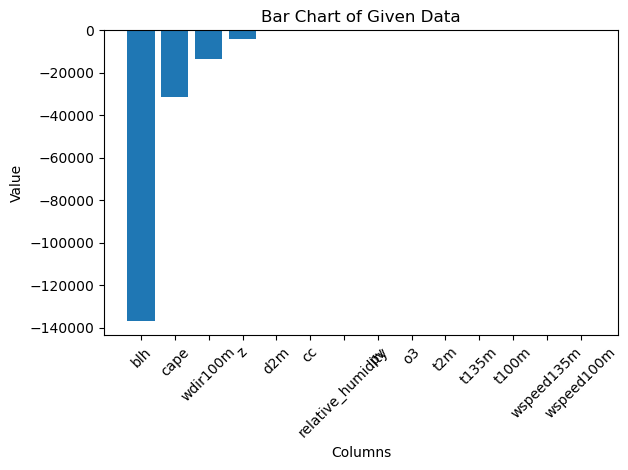

In [9]:
import matplotlib.pyplot as plt

plt.bar(sorted_columns, sorted_data)

# Add title and labels
plt.title("Bar Chart of Given Data")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

('blh', 'cape', 'wdir100m', 'z', 'd2m', 'cc', 'relative_humidity', 'o3', 'pv', 't2m', 't135m', 't100m', 'wspeed135m', 'wspeed100m')
(-232519.9001484204, -49415.66843856583, -30808.116698604423, -11995.482641110006, -210.36563083207673, -52.8627508823361, -10.843086673180215, -0.00026968386695827616, -0.00026071052582625877, -0.00015820433220550833, -5.6434681747771906e-05, -3.961379206070435e-05, -9.769758175152618e-06, -9.748980727547311e-06)


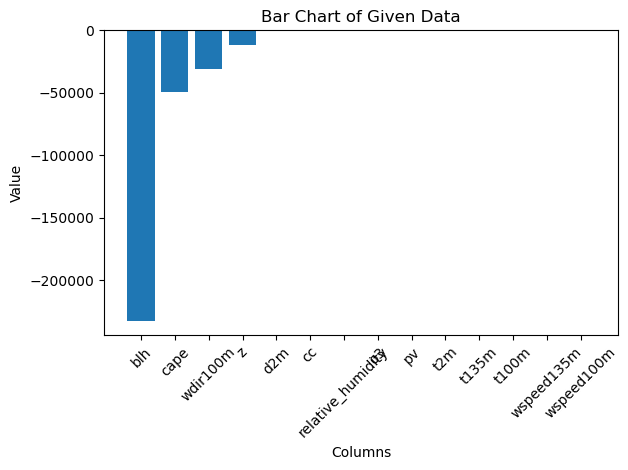

In [10]:
data = [-52.8627508823361, -0.00026968386695827616, -0.00026071052582625877, -49415.66843856583, -232519.9001484204, -210.36563083207673, -11995.482641110006, -10.843086673180215, -0.00015820433220550833, -3.961379206070435e-05, -5.6434681747771906e-05, -30808.116698604423, -9.769758175152618e-06, -9.748980727547311e-06]
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']
sorted_pairs = sorted(zip(columns, data), key=lambda x: x[1], reverse=False)

# Unzip the sorted pairs into two lists
sorted_columns, sorted_data = zip(*sorted_pairs)

print(sorted_columns)
print(sorted_data)

import matplotlib.pyplot as plt

plt.bar(sorted_columns, sorted_data)

# Add title and labels
plt.title("Bar Chart of Given Data")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

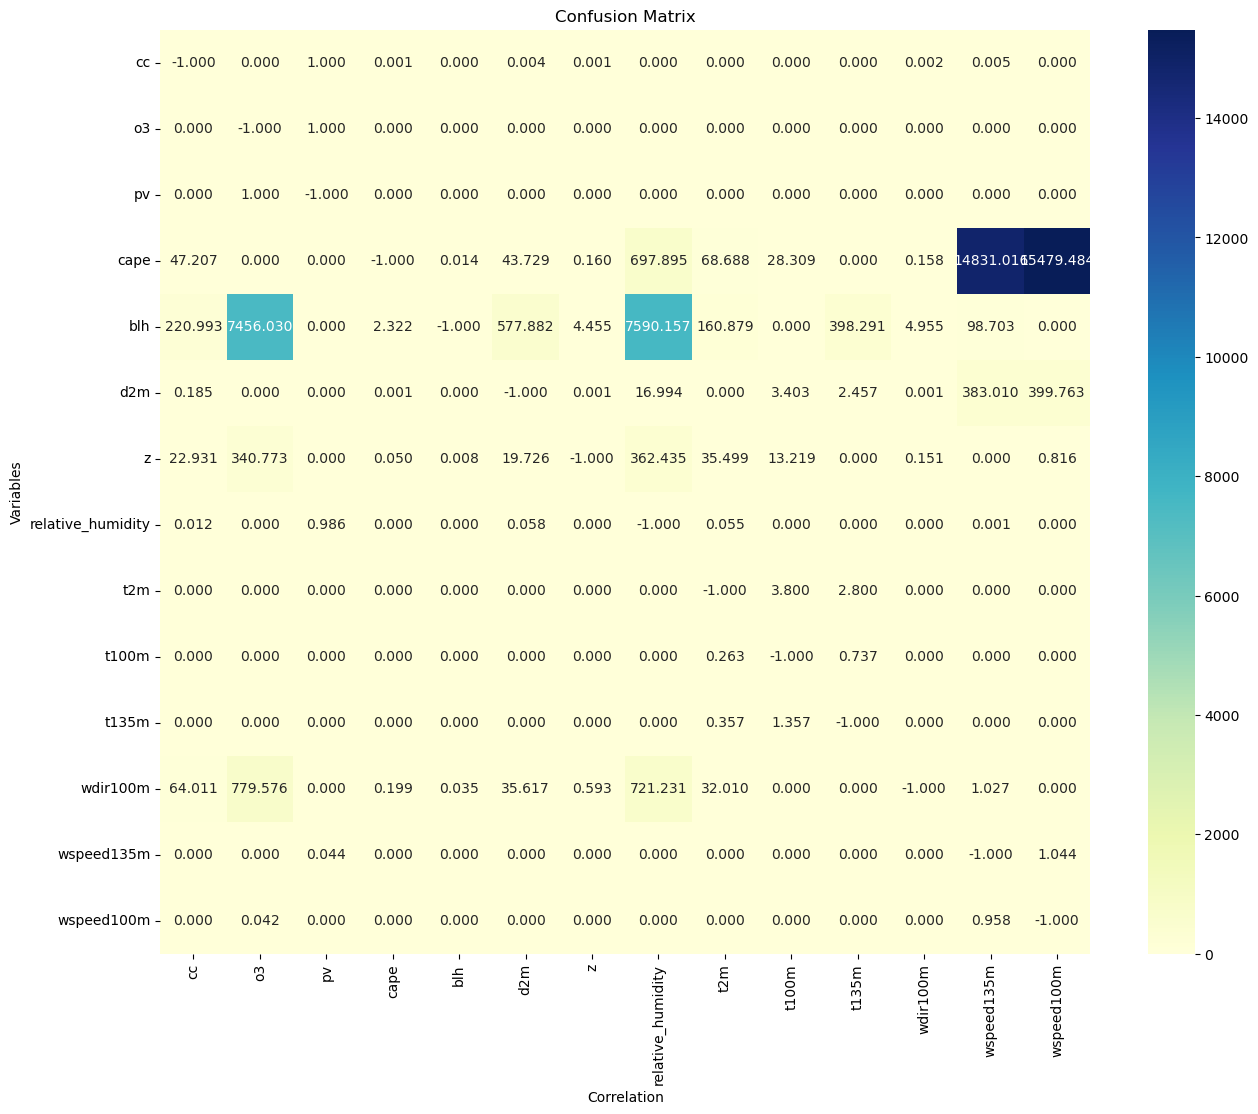

In [36]:
import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path_normal = "../resultados/Resultados presentados a la profesora/normal/coeffs_1_eucl.txt"
path_ideal = "../resultados/Resultados presentados a la profesora/ideal/coeffs_1_eucl_ideal.txt"

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']


text_file = open(os.path.join(path_ideal), "r")
data = text_file.read()
text_file.close()
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]

np_matrix = np.array(matrix)
abs_matrix = np.abs(np_matrix).tolist()

for idx, lista in enumerate(abs_matrix):
    lista.insert(idx, -1)

np_matrix = np.array(matrix)

# for idx, lista in enumerate(np_matrix):
#     np_matrix[idx] = np.insert(lista, idx, 200)

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(abs_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=columns, yticklabels=columns)
plt.ylabel('Variables')
plt.xlabel('Correlation')
plt.title('Confusion Matrix')
plt.show()